## Statistical tests on instrumental accuracy ##

This notebook shows a number of tests on temperature/pressure data of the BMP280 sensor, collected by Hessel Winsemius (21 Feb. 2018). Assumed is that a large set of reads is done in a short period of time in which no changes in atmoshperic pressure need to be assumed. We test:
- correlation temperature and pressure
- test for randomness of noise
- test on Central-limit theorem
- test on autocorrelation of pressure

In [51]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First read the data and draw a summary table

In [68]:
fn = os.path.join('..', 'data', 'bmp280_obs_20180221T220518.csv')

df = pd.read_csv(fn, index_col='time')
# df
var1, var2 = df.keys()
var3 = 'Elevation (m)'
df

,Temperature (°C),Pressure (Pa)
time,,
2018-02-21 22:05:20.066,21.51,102351.96
2018-02-21 22:05:20.069,21.10,102369.10
2018-02-21 22:05:20.070,21.10,102369.10
2018-02-21 22:05:20.072,21.08,102360.72
2018-02-21 22:05:20.074,21.09,102365.66
2018-02-21 22:05:20.076,21.08,102363.39
2018-02-21 22:05:20.080,21.08,102363.39
2018-02-21 22:05:20.084,21.10,102367.21
2018-02-21 22:05:20.086,21.10,102364.53


remove duplicates by comparison of value of pressure (var2) the time step before (by shifting with -1 step)

In [69]:
df = df.loc[df[var2].shift(-1) != df[var2]]
df

,Temperature (°C),Pressure (Pa)
time,,
2018-02-21 22:05:20.066,21.51,102351.96
2018-02-21 22:05:20.070,21.10,102369.10
2018-02-21 22:05:20.072,21.08,102360.72
2018-02-21 22:05:20.074,21.09,102365.66
2018-02-21 22:05:20.080,21.08,102363.39
2018-02-21 22:05:20.084,21.10,102367.21
2018-02-21 22:05:20.086,21.10,102364.53
2018-02-21 22:05:20.092,21.10,102359.20
2018-02-21 22:05:20.097,21.11,102363.41


In [70]:
# compute surrogate elevation
P0 = 101025
Tb = 288.15 # K
Lb = -0.0065
M = 0.0289644
g = 9.80665
R = 8.3144598
h = (np.log(df[var2])-np.log(P0))*R*Tb/(-g*M)
df[var3] = h


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


make a plot of the pressure and temperature timeseries, to see if they make any sense

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013C46D68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013F78320>], dtype=object)

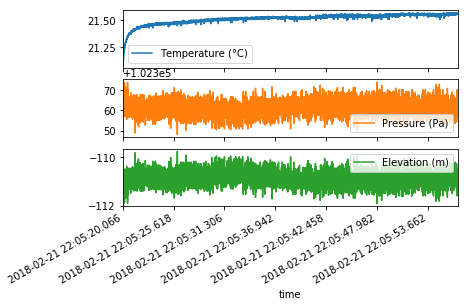

In [71]:
df.plot(subplots=True)

plot a running mean to see if there are variations over longer time periods (seconds)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000131927F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000155EED68>], dtype=object)

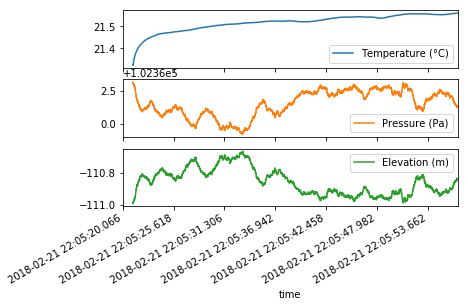

In [80]:
df.rolling(200).mean().plot(subplots=True)

Plot temperature against pressure to see if there are any relevant correlations to be seen

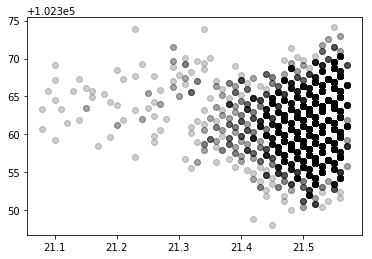

In [72]:
plt.plot(df[var1].values, df[var2].values, 'o', color='k', alpha=0.2)

Summarize the raw statistics

In [73]:
df.describe()

,Temperature (°C),Pressure (Pa),Elevation (m)
count,6593.000000,6593.000000,6593.000000
mean,21.514151,102361.546082,-110.857580
std,0.049119,3.592777,0.296047
min,21.080000,102348.070000,-111.894444
25%,21.500000,102358.860000,-111.073795
50%,21.520000,102361.510000,-110.854612
75%,21.550000,102364.170000,-110.636247
max,21.570000,102374.130000,-109.747074


compare real noise averaging against theoretical averaging of noise (central limit), by computing mean over several averaging windows


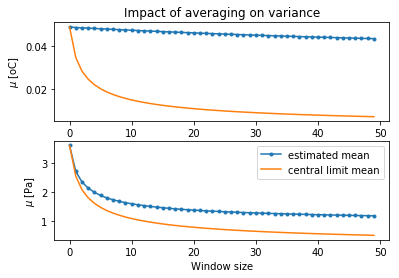

In [76]:
import matplotlib.pyplot as plt
wins = np.arange(1, 51)
std = [[df[var].rolling(window=win).mean().std() for win in wins] for var in [var1, var2]]
# .rename(columns=lambda x: x + 1)
# std = _.transpose().rename(lambda x: x + 1)

# also make an idealized white noise reduction with central limit assumption
white_noise_1 = [std[n][0:1]/np.sqrt(wins) for n in range(len(std))]

# glue together

ax = plt.subplot(211)
ax.plot(np.arange(len(std[0])), std[0], marker='.', label='estimated mean')
ax.plot(np.arange(len(std[0])), white_noise_1[0], label='central limit mean')
plt.xlabel('Window size')
plt.ylabel('$\mu$ [oC]')
plt.title('Impact of averaging on variance')
ax = plt.subplot(212)
ax.plot(np.arange(len(std[1])), std[1], marker='.', label='estimated mean')
ax.plot(np.arange(len(std[1])), white_noise_1[1], label='central limit mean')
plt.xlabel('Window size')
plt.ylabel('$\mu$ [Pa]')
plt.legend()

plot an autocorrelogram

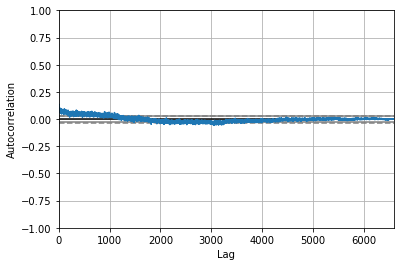

In [77]:
pd.plotting.autocorrelation_plot(df[var2])